# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    


The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about passengers aboard the RMS Titanic, including whether they survived or not. The dataset is often used for predictive modeling and classification tasks. Here are some key details about the Titanic dataset:

**Features**:

- `PassengerId`: Unique identifier for each passenger.
- `Pclass`: Ticket class (1st, 2nd, or 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's gender (male or female).
- `Age`: Passenger's age.
- `SibSp`: Number of siblings or spouses aboard.
- `Parch`: Number of parents or children aboard.
- `Ticket`: Ticket number.
- `Fare`: Fare paid for the ticket.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Target Variable**:

- `Survived`: Binary variable indicating whether the passenger survived (1) or not (0).
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a passenger survived based on the available features.

**Challenges**:

- Missing data in the columns such as `Age`, `Cabin`, and `Embarked`.
- Understanding passenger demographics and characteristics that influenced survival.(Model training)
- Exploring feature engineering techniques to improve model performance.(Feature engineering)

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Missing value handling for 'cabin', 'age' and 'embraked' with customized options i.e., 'delete', 'impute with median' and 'impute with mode' correspondingly.
- Binning on 'pclass' feature to get 2 different levels i.e., 'low' and 'high' based on values.
- Customized ordinal encoding on 'pclass' and target encoding on 'embracked'.
- Addition of 'parch' and 'sibsp' to get new feature 'Family_count'.
- Deletion of id column 'passanger' using antiselect.
- Train test split with training size 0.75.
- Data imbalance handling with 'SMOTE' method.
- Outlier filteration with 'percentile' method and customized lower-upper bound.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'min_node_size' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries

import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.

host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading titanic dataset from example data collection
load_example_data("teradataml", "titanic")

In [5]:
# Fetching in teradata dataframe
titanic = DataFrame.from_table("titanic")

In [6]:
titanic.columns

['passenger',
 'survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [7]:
# titanic dataset
titanic.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [8]:
# titanic dataset
titanic.shape

(891, 12)

In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
titanic_sample = titanic.sample(frac = [0.8, 0.2])

In [10]:
titanic_sample.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sampleid
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S,1
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S,1


In [11]:
# Fetching train and test data
titanic_train= titanic_sample[titanic_sample['sampleid'] == 1].drop('sampleid', axis=1)
titanic_test = titanic_sample[titanic_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
titanic_train.shape

(713, 12)

In [13]:
# test data shape
titanic_test.shape

(178, 12)

In [14]:
# train dataset
titanic_train.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [15]:
# test dataset
titanic_test.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
18,1,2,"Williams, Mr. Charles Eugene",male,None,0,0,244373,13.0,None,S
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0,None,S
22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0,D56,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,None,S
36,0,1,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52.0,None,S
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.475,None,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,None,C
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0,None,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [17]:
AutoML.generate_custom_config("custom_titanic")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  1,2,4,6,7,8



Customizing Missing Value Handling ...

Provide the following details to customize missing value handling:

Available missing value handling methods with corresponding indices: 
Index 1: Drop Columns
Index 2: Drop Rows
Index 3: Impute Missing values



Enter the list of indices for missing value handling methods :  1,3

Enter the feature or list of features for dropping columns with missing values:  cabin



Available missing value imputation methods with corresponding indices: 
Index 1: Statistical Imputation
Index 2: Literal Imputation



Enter the list of corresponding index missing value imputation methods you want to use:  1

Enter the feature or list of features for imputing missing values using statistic values:  age, embarked



Available statistical methods with corresponding indices:
Index 1: min
Index 2: max
Index 3: mean
Index 4: median
Index 5: mode



Enter the index of corresponding statistic imputation method for feature age:  4

Enter the index of corresponding statistic imputation method for feature embarked:  5



Customization of missing value handling has been completed successfully.

Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  pclass

Enter the index of corresponding binning method for feature pclass:  2

Enter the number of bins for feature pclass:  2



Available value type of feature for variable binning with corresponding indices:
Index 1: int
Index 2: float

Provide the range for bin 1 of feature pclass: 



Enter the index of corresponding value type of feature pclass:  1

Enter the minimum value for bin 1 of feature pclass:  0

Enter the maximum value for bin 1 of feature pclass:  1

Enter the label for bin 1 of feature pclass:  low



Provide the range for bin 2 of feature pclass: 



Enter the index of corresponding value type of feature pclass:  1

Enter the minimum value for bin 2 of feature pclass:  2

Enter the maximum value for bin 2 of feature pclass:  3

Enter the label for bin 2 of feature pclass:  high



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  2,3

Enter the feature or list of features for OrdinalEncoding:  pclass

Enter the feature or list of features for TargetEncoding:  embarked



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature embarked:  3

Enter the response column for target encoding method for feature embarked:  survived



Customization of categorical encoding has been completed successfully.

Customizing Nonlinear Transformation ...

Provide the following details to customize nonlinear transformation:



Enter number of non-linear combination you want to make:  1



Provide the details for non-linear combination 1:



Enter the list of target feature/s for non-linear combination 1:  parch, sibsp

Enter the formula for non-linear combination 1:  Y=(X0+X1+1)

Enter the resultant feature for non-linear combination 1:  Family_count



Customization of nonlinear transformation has been completed successfully.

Customizing Antiselect Features ...



Enter the feature or list of features for antiselect:  passenger



Customization of antiselect features has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2,3,4,5



Customizing Train Test Split ...



Enter the train size for train test split:  0.75



Customization of train test split has been completed successfully.

Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  1

Enter the lower percentile value for outlier handling:  0.1

Enter the upper percentile value for outlier handling:  0.9

Enter the feature or list of features for outlier handling:  fare



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature fare:  2



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Customization of feature scaling has been completed successfully.

Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1,2



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  3

Enter the index of corresponding update method for hyperparameters 'min_node_size' for model 'xgboost':  1

Enter the list of value for hyperparameter 'min_node_size' for model 'xgboost':  1,5



Customization of model hyperparameter has been completed successfully.

Customization of model training phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  4



Generating custom json and exiting ...

Process of generating custom config file for AutoML has been completed successfully.

'custom_titanic.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [18]:
# Creating AutoML Instance with task type 'Classification'
# Including only decision forest and xgboost model from default model list for training.
# Using early stopping timer criteria with value 300 sec.
# Passing custom json file to provide customized value for AutoML.

aml = AutoML(task_type="Classification",
             include=['decision_forest','xgboost'],
             verbose=2,
             max_runtime_secs=300,
             custom_config_file='custom_titanic.json')


 Received below input for customization : 
{
    "MissingValueHandlingIndicator": true,
    "MissingValueHandlingParam": {
        "DroppingColumnIndicator": true,
        "DroppingColumnList": [
            "cabin"
        ],
        "ImputeMissingIndicator": true,
        "StatImputeList": [
            "age",
            "embarked"
        ],
        "StatImputeMethod": [
            "median",
            "mode"
        ]
    },
    "BincodeIndicator": true,
    "BincodeParam": {
        "pclass": {
            "Type": "Variable-Width",
            "NumOfBins": 2,
            "Bin_1": {
                "min_value": 0,
                "max_value": 1,
                "label": "low"
            },
            "Bin_2": {
                "min_value": 2,
                "max_value": 3,
                "label": "high"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncoding

Feature Exploration started ...

Data Overview:
Total Rows in the data: 713
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
sibsp,INTEGER,713,0,None,499,214,0,0.0,100.0
parch,INTEGER,713,0,None,547,166,0,0.0,100.0
age,INTEGER,570,143,None,7,563,0,20.05610098176718,79.94389901823281
passenger,INTEGER,713,0,None,0,713,0,0.0,100.0
fare,FLOAT,713,0,None,12,701,0,0.0,100.0
cabin,VARCHAR(20) CHARACTER SET LATIN,163,550,0,None,None,None,77.13884992987377,22.86115007012623
survived,INTEGER,713,0,None,435,278,0,0.0,100.0
pclass,INTEGER,713,0,None,0,713,0,0.0,100.0
embarked,VARCHAR(20) CHARACTER SET LATIN,711,2,0,None,None,None,0.2805049088359046,99.71949509116409
name,VARCHAR(1000) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,passenger,survived,pclass,age,sibsp,parch,fare
50%,438,0,3,28,0,0,14.454
count,713,713,713,570,713,713,713
mean,443.129,0.39,2.314,29.263,0.499,0.362,31.776
min,1,0,1,0,0,0,0
max,891,1,3,80,8,6,512.329
75%,664,1,3,37,1,0,30.696
25%,219,0,2,20,0,0,7.896
std,255.869,0.488,0.844,14.639,1.102,0.772,50.272



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
name                      713       
sex                       2         
ticket                    575       
cabin                     129       
embarked                  3         

Futile columns in dataset:


ColumnName
name
ticket



Target Column Distribution:


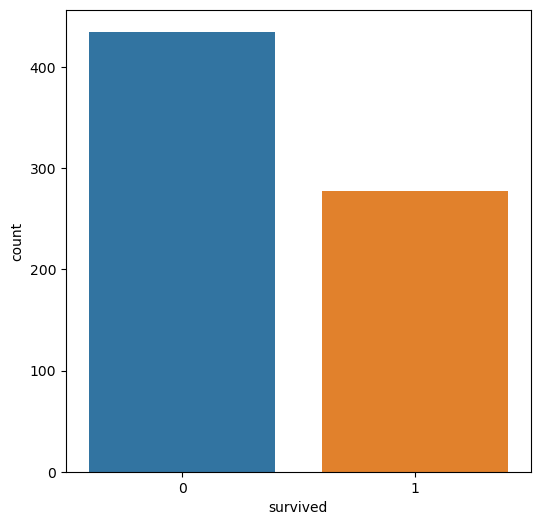

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0       fare          12.903226
1        age          21.598878
2      sibsp           4.908836
3      parch          23.281907


Analysis complete. No action taken.                                                     


['ticket', 'name']


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
265,0,3,female,None,0,0,7.75,None,Q,9
835,0,3,male,18,0,0,8.3,None,S,15
427,1,2,female,28,1,0,26.0,None,S,23
122,0,3,male,None,0,0,8.05,None,S,11
80,1,3,female,30,0,0,12.475,None,S,12
242,1,3,female,None,1,0,15.5,None,Q,20
326,1,1,female,36,0,0,135.6333,C32,C,13
732,0,3,male,11,0,0,18.7875,None,C,21
61,0,3,male,22,0,0,7.2292,None,C,14
795,0,3,male,25,0,0,7.8958,None,S,22


Dataset does not contain any feature related to dates.                                   


['cabin']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711276894826796"'20


passenger,survived,pclass,sex,age,sibsp,parch,fare,embarked,id
284,1,3,male,19,0,0,8.05,S,25
17,0,3,male,2,4,1,29.125,Q,41
608,1,1,male,27,0,0,30.5,S,49
404,0,3,male,28,1,0,15.85,S,57
301,1,3,female,28,0,0,7.75,Q,73
770,0,3,male,32,0,0,8.3625,S,81
261,0,3,male,28,0,0,7.75,Q,65
549,0,3,male,33,1,1,20.525,S,33
530,0,2,male,23,2,1,11.5,S,17
265,0,3,female,28,0,0,7.75,Q,9


Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,pclass,0,1,low
1,pclass,2,3,high


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711269284362837"'20


survived,sex,age,passenger,sibsp,fare,id,embarked,parch,pclass
1,male,45,339,0,8.05,124,S,0,high
1,female,14,436,1,120.0,252,S,2,low 
1,male,28,66,1,15.2458,268,C,1,high
1,female,28,331,2,23.25,276,Q,0,high
1,female,27,718,0,10.5,292,S,0,high
1,male,28,840,0,29.7,300,C,0,low 
0,male,22,244,0,7.125,38,S,0,high
0,male,34,406,1,21.0,54,S,0,high
0,male,28,467,0,0.0,70,S,0,high
0,female,28,181,8,69.55,78,S,2,high


Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 25% - 5/20


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711271476344904"'20


survived,sex,age,passenger,sibsp,fare,id,embarked,parch,pclass
1,male,28,66,1,15.2458,268,C,1,0
1,female,27,718,0,10.5,292,S,0,0
1,male,28,840,0,29.7,300,C,0,1
1,female,56,880,0,83.1583,308,C,1,1
1,male,18,205,0,8.05,340,S,0,0
1,female,0,470,2,19.2583,348,C,1,0
0,male,28,467,0,0.0,70,S,0,0
0,male,26,629,0,7.8958,94,S,0,0
0,male,21,116,0,7.925,102,S,0,0
0,male,28,585,0,8.7125,110,C,0,0


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711271603345896"'20


embarked,survived,sex,age,passenger,sibsp,fare,id,pclass,parch
0.539568345323741,1,female,50,300,0,247.5208,442,1,1
0.539568345323741,0,female,45,363,0,14.4542,360,0,1
0.539568345323741,0,male,26,74,1,14.4542,123,0,0
0.539568345323741,0,male,28,496,0,14.4583,537,0,0
0.539568345323741,0,male,28,774,0,7.225,32,0,0
0.539568345323741,0,male,28,421,0,7.8958,112,0,0
0.34448818897637795,0,male,21,116,0,7.925,102,0,0
0.34448818897637795,0,male,25,785,0,7.05,158,0,0
0.34448818897637795,0,male,24,295,0,7.8958,166,0,0
0.34448818897637795,0,male,19,28,3,263.0,206,1,2


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711269435106866"'20


['sex']


Skipping customized mathematical transformation.                                         


['Combination_1']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711270908739134"'20


embarked,survived,sex_0,sex_1,age,passenger,sibsp,fare,id,pclass,parch,Family_count
0.539568345323741,1,1,0,28,257,0.0,79.2,142,1,0.0,1.0
0.539568345323741,1,0,1,1,828,0.0,37.0042,615,0,2.0,3.0
0.539568345323741,1,1,0,15,831,1.0,14.4542,74,0,0.0,2.0
0.539568345323741,0,0,1,28,43,0.0,7.8958,272,0,0.0,1.0
0.539568345323741,1,1,0,36,326,0.0,135.6333,13,1,0.0,1.0
0.539568345323741,0,0,1,29,362,1.0,27.7208,84,0,0.0,2.0
0.34448818897637795,0,0,1,36,596,1.0,24.15,254,0,1.0,3.0
0.34448818897637795,0,1,0,25,247,0.0,7.775,302,0,0.0,1.0
0.34448818897637795,0,0,1,1,165,4.0,39.6875,318,0,1.0,6.0
0.34448818897637795,0,0,1,28,634,0.0,0.0,326,1,0.0,1.0


embarked,survived,sex_0,sex_1,age,sibsp,fare,id,pclass,parch,Family_count
0.539568345323741,1,1,0,28,0.0,79.2,142,1,0.0,1.0
0.539568345323741,1,0,1,1,0.0,37.0042,615,0,2.0,3.0
0.539568345323741,1,1,0,15,1.0,14.4542,74,0,0.0,2.0
0.539568345323741,0,0,1,28,0.0,7.8958,272,0,0.0,1.0
0.539568345323741,1,1,0,36,0.0,135.6333,13,1,0.0,1.0
0.539568345323741,0,0,1,29,1.0,27.7208,84,0,0.0,2.0
0.34448818897637795,0,0,1,36,1.0,24.15,254,0,1.0,3.0
0.34448818897637795,0,1,0,25,0.0,7.775,302,0,0.0,1.0
0.34448818897637795,0,0,1,1,4.0,39.6875,318,0,1.0,6.0
0.34448818897637795,0,0,1,28,0.0,0.0,326,1,0.0,1.0


Training size : 0.75                                                                      
Testing size  : 0.25                                                                      


embarked,survived,sex_0,sex_1,age,sibsp,fare,id,pclass,parch,Family_count
0.539568345323741,0,0,1,22,0.0,7.2292,14,0,0.0,1.0
0.539568345323741,0,0,1,28,0.0,7.225,32,0,0.0,1.0
0.4057971014492754,0,0,1,2,4.0,29.125,41,0,1.0,6.0
0.539568345323741,0,0,1,58,0.0,29.7,46,1,0.0,1.0
0.539568345323741,1,1,0,24,0.0,49.5042,53,1,0.0,1.0
0.539568345323741,1,1,0,28,1.0,24.0,62,0,0.0,2.0
0.34448818897637795,0,0,1,28,0.0,8.05,11,0,0.0,1.0
0.34448818897637795,0,0,1,9,4.0,31.3875,16,0,2.0,7.0
0.34448818897637795,0,0,1,23,2.0,11.5,17,0,1.0,4.0
0.34448818897637795,0,0,1,35,0.0,7.125,19,0,0.0,1.0


embarked,survived,sex_0,sex_1,age,sibsp,fare,id,pclass,parch,Family_count
0.4057971014492754,1,1,0,28,1.0,15.5,20,0,0.0,2.0
0.4057971014492754,0,0,1,57,0.0,12.35,89,0,0.0,1.0
0.539568345323741,1,1,0,35,0.0,512.3292,100,1,0.0,1.0
0.539568345323741,1,1,0,28,1.0,89.1042,104,1,0.0,2.0
0.539568345323741,1,0,1,27,0.0,76.7292,187,1,0.0,1.0
0.539568345323741,0,0,1,28,2.0,21.6792,197,0,0.0,3.0
0.34448818897637795,1,1,0,30,0.0,12.475,12,0,0.0,1.0
0.34448818897637795,0,0,1,18,0.0,8.3,15,0,0.0,1.0
0.34448818897637795,1,0,1,80,0.0,30.0,18,1,0.0,1.0
0.34448818897637795,0,0,1,28,0.0,7.8958,29,0,0.0,1.0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
     ColumnName  OutlierPercentage
0           age           9.677419
1  Family_count           4.908836
2         sibsp           4.908836
3            id           9.817672
4         parch           1.402525
5          fare           9.677419
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711269458399231"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711269984350360"'/20
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171126

['sex_1', 'age', 'sibsp', 'fare', 'pclass', 'Family_count', 'sex_0']


['age', 'sibsp', 'fare', 'pclass', 'Family_count']


survived,sex_1,sex_0,id,age,sibsp,fare,pclass,Family_count
1,0,1,37,-0.4897447097849622,-0.43678884383879596,-0.7292682687348625,-0.6105330807364387,-0.5349681233730221
1,1,0,43,1.4648418001191472,0.47432538510619243,1.1852683674141438,1.6379128855618945,0.09150770531380635
0,1,0,31,1.6993921813076405,-0.43678884383879596,-0.7077324235588331,-0.6105330807364387,-0.5349681233730221
1,1,0,45,-1.9752304573120854,-0.43678884383879596,2.4713158194530163,1.6379128855618945,0.7179835340006347
1,1,0,49,-0.17701086820030468,-0.43678884383879596,0.2592270248448832,1.6379128855618945,-0.5349681233730221
0,1,0,39,0.2920898941766816,-0.43678884383879596,-0.6452784725483481,-0.6105330807364387,-0.5349681233730221
0,1,0,33,0.2920898941766816,0.47432538510619243,-0.17041308641690178,-0.6105330807364387,0.7179835340006347
0,1,0,28,-0.6461116305772909,-0.43678884383879596,-0.7077324235588331,-0.6105330807364387,-0.5349681233730221
0,1,0,24,-0.0988274078041403,-0.43678884383879596,-0.0842697057127845,-0.6105330807364387,-0.5349681233730221
1,0,1,30,-0.8806620117657841,-0.43678884383879596,-0.06381065279555659,-0.6105330807364387,0.09150770531380635


survived,sex_1,sex_0,id,age,sibsp,fare,pclass,Family_count
1,0,1,104,-0.0988274078041403,0.47432538510619243,2.783408980574998,1.6379128855618945,0.09150770531380635
1,1,0,187,-0.17701086820030468,-0.43678884383879596,2.2503968124682725,1.6379128855618945,-0.5349681233730221
0,1,0,68,0.2920898941766816,-0.43678884383879596,-0.5257545318213854,-0.6105330807364387,-0.5349681233730221
1,1,0,231,-0.7242950909734553,0.47432538510619243,-0.3764379028779038,-0.6105330807364387,0.7179835340006347
1,0,1,348,-2.287964298896743,1.3854396140511809,-0.22497199658585446,-0.6105330807364387,1.344459362687463
0,1,0,98,-0.8024785513696198,-0.43678884383879596,-0.6163859826601872,-0.6105330807364387,-0.5349681233730221
0,1,0,81,0.2139064337805172,-0.43678884383879596,-0.6942725203238148,-0.6105330807364387,-0.5349681233730221
0,1,0,47,-0.0988274078041403,6.852124987721111,1.9411765330927728,-0.6105330807364387,5.729790163495262
0,1,0,38,-0.5679281701811266,-0.43678884383879596,-0.7475737371344874,-0.6105330807364387,-0.5349681233730221
1,1,0,66,2.090309483288462,-0.43678884383879596,0.47458547660517636,1.6379128855618945,-0.5349681233730221


['sex_1', 'age', 'pclass', 'sex_0', 'fare', 'Family_count']


['r_age', 'r_pclass', 'r_fare', 'r_Family_count']


r_sex_0,survived,r_sex_1,id,r_age,r_pclass,r_fare,r_Family_count
1,1,0,37,-0.4897447097849622,-0.6105330807364387,-0.7292682687348625,-0.5349681233730221
0,1,1,43,1.4648418001191472,1.6379128855618945,1.1852683674141438,0.09150770531380635
0,0,1,31,1.6993921813076405,-0.6105330807364387,-0.7077324235588331,-0.5349681233730221
0,1,1,45,-1.9752304573120854,1.6379128855618945,2.4713158194530163,0.7179835340006347
0,1,1,49,-0.17701086820030468,1.6379128855618945,0.2592270248448832,-0.5349681233730221
0,0,1,39,0.2920898941766816,-0.6105330807364387,-0.6452784725483481,-0.5349681233730221
0,0,1,33,0.2920898941766816,-0.6105330807364387,-0.17041308641690178,0.7179835340006347
0,0,1,28,-0.6461116305772909,-0.6105330807364387,-0.7077324235588331,-0.5349681233730221
0,0,1,24,-0.0988274078041403,-0.6105330807364387,-0.0842697057127845,-0.5349681233730221
1,1,0,30,-0.8806620117657841,-0.6105330807364387,-0.06381065279555659,0.09150770531380635


r_sex_0,survived,r_sex_1,id,r_age,r_pclass,r_fare,r_Family_count
1,1,0,104,-0.0988274078041403,1.6379128855618945,2.783408980574998,0.09150770531380635
0,1,1,187,-0.17701086820030468,1.6379128855618945,2.2503968124682725,-0.5349681233730221
0,0,1,68,0.2920898941766816,-0.6105330807364387,-0.5257545318213854,-0.5349681233730221
0,1,1,231,-0.7242950909734553,-0.6105330807364387,-0.3764379028779038,0.7179835340006347
1,1,0,348,-2.287964298896743,-0.6105330807364387,-0.22497199658585446,1.344459362687463
0,0,1,98,-0.8024785513696198,-0.6105330807364387,-0.6163859826601872,-0.5349681233730221
0,0,1,81,0.2139064337805172,-0.6105330807364387,-0.6942725203238148,-0.5349681233730221
0,0,1,47,-0.0988274078041403,-0.6105330807364387,1.9411765330927728,5.729790163495262
0,0,1,38,-0.5679281701811266,-0.6105330807364387,-0.7475737371344874,-0.5349681233730221
0,1,1,66,2.090309483288462,1.6379128855618945,0.47458547660517636,-0.5349681233730221


['embarked', 'age', 'sibsp', 'fare', 'pclass', 'parch', 'Family_count']


survived,sex_1,sex_0,id,embarked,age,sibsp,fare,pclass,parch,Family_count
1,0,1,23,-0.5741666531334157,-0.09882740780414037,0.47432538510619154,0.06540441826061827,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
1,0,1,26,-0.5741666531334157,-1.9752304573120867,0.47432538510619154,-0.06381065279555768,-0.6105330807364342,0.7943290096665457,0.7179835340006344
0,1,0,27,-0.5741666531334157,-2.20978083850058,4.118782300886139,0.965602746618644,-0.6105330807364342,2.0643041329058733,3.850362677434775
0,1,0,28,-0.5741666531334157,-0.6461116305772914,-0.4367888438387952,-0.7077324235588345,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,1,0,31,-0.5741666531334157,1.6993921813076416,-0.4367888438387952,-0.7077324235588345,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,1,0,33,-0.5741666531334157,0.2920898941766818,0.47432538510619154,-0.1704130864169029,-0.6105330807364342,0.7943290096665457,0.7179835340006344
0,1,0,123,1.9579754480604998,-0.25519432859646923,0.47432538510619154,-0.4318927042061805,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
0,1,0,110,1.9579754480604998,-0.09882740780414037,-0.4367888438387952,-0.6791974287005956,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,0,1,228,1.9579754480604998,-0.09882740780414037,0.47432538510619154,-0.43171611027573703,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
1,0,1,142,1.9579754480604998,-0.09882740780414037,-0.4367888438387952,2.3568183449901388,1.637912885561882,-0.47564611357278197,-0.5349681233730219


survived,sex_1,sex_0,id,embarked,age,sibsp,fare,pclass,parch,Family_count
1,0,1,20,0.22162355617218002,-0.09882740780414037,0.47432538510619154,-0.38684833043599753,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
0,1,0,89,0.22162355617218002,2.1684929436846283,-0.4367888438387952,-0.5225241550449823,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
1,0,1,100,1.9579754480604998,0.44845681496901063,-0.4367888438387952,21.01242512982502,1.637912885561882,-0.47564611357278197,-0.5349681233730219
1,0,1,104,1.9579754480604998,-0.09882740780414037,0.47432538510619154,2.783408980574998,1.637912885561882,-0.47564611357278197,0.09150770531380631
1,1,0,187,1.9579754480604998,-0.17701086820030482,-0.4367888438387952,2.250396812468272,1.637912885561882,-0.47564611357278197,-0.5349681233730219
0,1,0,197,1.9579754480604998,-0.09882740780414037,1.3854396140511784,-0.12069974141255667,-0.6105330807364342,-0.47564611357278197,0.7179835340006344
1,0,1,12,-0.5741666531334157,0.05753951298818849,-0.4367888438387952,-0.517140193750975,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,1,0,15,-0.5741666531334157,-0.8806620117657847,-0.4367888438387952,-0.6969645009708197,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
1,1,0,18,-0.5741666531334157,3.9667125327964103,-0.4367888438387952,0.23769117966885286,1.637912885561882,-0.47564611357278197,-0.5349681233730219
0,1,0,29,-0.5741666531334157,-0.09882740780414037,-0.4367888438387952,-0.7143740782111219,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


                                                                                          
Completed customized hyperparameter update.


response_column : survived                                                                                                                            
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : survived
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3, 5)
iter_num : (10, 20, 30)
Total number of models for xgboost : 3456
-------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.776536,0.776536,0.776536,0.776536,0.774172,0.747510,0.755063,0.775548,0.776536,0.770864
1,2,decision_forest,pca,0.743017,0.743017,0.743017,0.743017,0.753030,0.696986,0.703983,0.748739,0.743017,0.727403
2,3,decision_forest,rfe,0.698324,0.698324,0.698324,0.698324,0.769398,0.621953,0.605018,0.748865,0.698324,0.646845
3,4,xgboost,rfe,0.681564,0.681564,0.681564,0.681564,0.724638,0.605636,0.586001,0.712007,0.681564,0.629338
4,5,decision_forest,lasso,0.608939,0.608939,0.608939,0.608939,0.304469,0.500000,0.378472,0.370806,0.608939,0.460933
5,6,xgboost,lasso,0.391061,0.391061,0.391061,0.391061,0.195531,0.500000,0.281124,0.152929,0.391061,0.219874


In [20]:
# Fitting train data
aml.fit(titanic_train, titanic_train.survived)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [21]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.776536,0.776536,0.776536,0.776536,0.774172,0.747510,0.755063,0.775548,0.776536,0.770864
1,2,decision_forest,pca,0.743017,0.743017,0.743017,0.743017,0.753030,0.696986,0.703983,0.748739,0.743017,0.727403
2,3,decision_forest,rfe,0.698324,0.698324,0.698324,0.698324,0.769398,0.621953,0.605018,0.748865,0.698324,0.646845
3,4,xgboost,rfe,0.681564,0.681564,0.681564,0.681564,0.724638,0.605636,0.586001,0.712007,0.681564,0.629338
4,5,decision_forest,lasso,0.608939,0.608939,0.608939,0.608939,0.304469,0.500000,0.378472,0.370806,0.608939,0.460933
5,6,xgboost,lasso,0.391061,0.391061,0.391061,0.391061,0.195531,0.500000,0.281124,0.152929,0.391061,0.219874


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [22]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.776536,0.776536,0.776536,0.776536,0.774172,0.74751,0.755063,0.775548,0.776536,0.770864


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [23]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

xgboost pca

 Prediction : 
   survived  id  Prediction  Confidence_Lower  Confidence_upper
0         0  15           0             1.000             1.000
1         1  18           0             0.750             0.750
2         1  20           1             0.625             0.625
3         0  29           0             1.000             1.000
4         0  38           0             0.875             0.875
5         0  89           0             0.875             0.875
6         1  66           0             0.625             0.625
7         1  10           1             0.625             0.625
8         0   9           1             1.000             1.000
9         1  12           1             0.875             0.875

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       96       27   0.780488  0.880734  0.8275

AUC,GINI
0.7108781127129752,0.42175622542595037


threshold_value,tpr,fpr
0.04081632653061224,0.6142857142857143,0.11926605504587157
0.08163265306122448,0.6142857142857143,0.11926605504587157
0.1020408163265306,0.6142857142857143,0.11926605504587157
0.12244897959183673,0.6142857142857143,0.11926605504587157
0.16326530612244897,0.6142857142857143,0.11926605504587157
0.18367346938775508,0.6142857142857143,0.11926605504587157
0.14285714285714285,0.6142857142857143,0.11926605504587157
0.061224489795918366,0.6142857142857143,0.11926605504587157
0.02040816326530612,0.6142857142857143,0.11926605504587157
0.0,1.0,1.0



 Confusion Matrix : 


array([[96, 13],
       [27, 43]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

survived,id,Prediction,Confidence_Lower,Confidence_upper
0,40,0,0.875,0.875
0,68,0,0.75,0.75
0,197,0,0.875,0.875
0,81,0,0.625,0.625
0,90,0,1.0,1.0
0,98,0,0.875,0.875
0,207,0,0.75,0.75
0,47,0,0.75,0.75
0,89,0,0.875,0.875
0,29,0,1.0,1.0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [25]:
# Generating prediction and metrics on test data
prediction = aml.predict(titanic_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping futile columns :


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
345,0,2,male,36,0,0,13.0,None,S,12
814,0,3,female,6,4,2,31.275,None,S,8
364,0,3,male,35,0,0,7.05,None,S,16
101,0,3,female,28,0,0,7.8958,None,S,9
570,1,3,male,32,0,0,7.8542,None,S,15
162,1,2,female,40,0,0,15.75,None,S,23
120,0,3,female,2,4,2,31.275,None,S,10
749,0,1,male,19,1,0,53.1,D30,S,18
305,0,3,male,None,0,0,8.05,None,S,13
484,1,3,female,63,0,0,9.5875,None,S,21



Updated dataset after performing target column transformation :


sex,age,passenger,sibsp,fare,cabin,id,embarked,pclass,parch,survived
male,None,305,0,8.05,None,13,S,3,0,0
female,2,120,4,31.275,None,10,S,3,2,0
male,19,749,1,53.1,D30,18,S,1,0,0
male,23,734,0,13.0,None,14,S,2,0,0
female,6,814,4,31.275,None,8,S,3,2,0
male,35,364,0,7.05,None,16,S,3,0,0
female,18,856,0,9.35,None,11,S,3,1,1
female,31,19,1,18.0,None,19,S,3,0,0
male,32,570,0,7.8542,None,15,S,3,0,1
female,40,162,0,15.75,None,23,S,2,0,1



Updated dataset after dropping customized missing value containing columns :


sex,age,passenger,sibsp,fare,id,embarked,pclass,parch,survived
female,6,814,4,31.275,8,S,3,2,0
male,32,570,0,7.8542,15,S,3,0,1
female,40,162,0,15.75,23,S,2,0,1
female,2,120,4,31.275,10,S,3,2,0
male,36,345,0,13.0,12,S,2,0,0
male,48,772,0,7.8542,20,S,3,0,0
male,None,305,0,8.05,13,S,3,0,0
female,63,484,0,9.5875,21,S,3,0,1
female,18,856,0,9.35,11,S,3,1,1
female,31,19,1,18.0,19,S,3,0,0



Updated dataset after imputing customized missing value containing columns :


sex,age,passenger,sibsp,fare,id,embarked,pclass,parch,survived
female,41,639,0,39.6875,153,S,3,5,0
female,5,59,1,27.75,35,S,2,2,1
female,22,324,1,29.0,43,S,2,1,1
female,49,53,1,76.7292,67,C,1,0,1
female,28,432,1,16.1,99,S,3,0,1
female,48,737,1,34.375,107,S,3,3,0
female,38,358,0,13.0,83,S,2,0,0
female,18,856,0,9.35,11,S,3,1,1
female,36,519,1,26.0,137,S,2,0,1
female,30,727,3,21.0,105,S,2,0,1


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711269865250673"'

Updated dataset after performing customized variable width bin-code transformation :


survived,sex,age,passenger,sibsp,fare,id,embarked,parch,pclass
1,male,2,341,1,26.0,40,S,1,high
1,male,28,548,0,13.8625,98,C,0,high
1,male,32,544,1,26.0,125,S,0,high
1,male,25,268,1,7.775,92,S,0,high
1,male,6,752,0,12.475,126,S,1,high
1,male,28,710,1,15.2458,111,C,1,high
0,male,18,386,0,73.5,73,S,0,high
0,male,28,769,1,24.15,97,Q,0,high
0,male,39,807,0,0.0,113,S,0,low 
0,male,22,479,0,7.5208,121,S,0,high


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711270718641038"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711270606733830"'

Updated dataset after performing customized categorical encoding :


embarked,survived,sex,age,passenger,sibsp,fare,id,pclass,parch
0.34448818897637795,0,male,28,224,0,7.8958,139,0,0
0.34448818897637795,0,male,19,380,0,7.775,119,0,0
0.34448818897637795,0,male,39,706,0,26.0,135,0,0
0.34448818897637795,0,male,64,439,1,263.0,151,1,4
0.34448818897637795,0,male,16,267,4,39.6875,191,0,1
0.34448818897637795,0,male,35,364,0,7.05,16,0,0
0.539568345323741,0,male,56,175,0,30.6958,42,1,0
0.539568345323741,0,male,17,533,1,7.2292,100,0,1
0.539568345323741,0,male,30,453,0,27.75,86,1,0
0.539568345323741,0,male,28,558,0,227.525,66,1,0


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711278646806110"'

Updated dataset after performing categorical encoding :


embarked,survived,sex_0,sex_1,age,passenger,sibsp,fare,id,pclass,parch
0.34448818897637795,0,0,1,39,706,0,26.0,135,0,0
0.34448818897637795,0,0,1,16,267,4,39.6875,191,0,1
0.34448818897637795,0,0,1,35,364,0,7.05,16,0,0
0.34448818897637795,0,0,1,25,76,0,7.65,32,0,0
0.34448818897637795,0,0,1,28,491,1,19.9667,120,0,0
0.34448818897637795,0,0,1,11,60,5,46.9,128,0,2
0.539568345323741,1,0,1,28,548,0,13.8625,98,0,0
0.539568345323741,0,0,1,49,699,1,110.8833,41,1,1
0.539568345323741,0,1,0,18,703,0,14.4542,62,0,1
0.539568345323741,0,0,1,30,453,0,27.75,86,1,0


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711278291798639"'

Updated dataset after performing customized non-linear transformation :


embarked,survived,sex_0,sex_1,age,passenger,sibsp,fare,id,pclass,parch,Family_count
0.539568345323741,0,0,1,56,175,0.0,30.6958,42,1,0.0,1.0
0.539568345323741,1,1,0,13,781,0.0,7.2292,84,0,0.0,1.0
0.539568345323741,0,0,1,65,55,0.0,61.9792,36,1,1.0,2.0
0.539568345323741,1,1,0,4,692,0.0,13.4167,31,0,1.0,2.0
0.539568345323741,0,0,1,17,533,1.0,7.2292,100,0,1.0,3.0
0.539568345323741,0,0,1,18,506,1.0,108.9,134,1,0.0,2.0
0.34448818897637795,0,0,1,39,706,0.0,26.0,135,0,0.0,1.0
0.34448818897637795,0,0,1,16,267,4.0,39.6875,191,0,1.0,6.0
0.34448818897637795,0,0,1,35,364,0.0,7.05,16,0,0.0,1.0
0.34448818897637795,0,0,1,25,76,0.0,7.65,32,0,0.0,1.0



Updated dataset after performing customized anti-selection :


embarked,survived,sex_0,sex_1,age,sibsp,fare,id,pclass,parch,Family_count
0.34448818897637795,0,0,1,35,0.0,7.05,16,0,0.0,1.0
0.34448818897637795,0,0,1,28,1.0,19.9667,120,0,0.0,2.0
0.34448818897637795,0,0,1,11,5.0,46.9,128,0,2.0,8.0
0.34448818897637795,0,0,1,28,0.0,7.8958,136,0,0.0,1.0
0.34448818897637795,0,0,1,54,0.0,26.0,34,0,0.0,1.0
0.34448818897637795,0,0,1,46,0.0,26.0,50,0,0.0,1.0
0.539568345323741,1,1,0,28,0.0,110.8833,170,1,0.0,1.0
0.539568345323741,0,0,1,33,0.0,8.6625,199,0,0.0,1.0
0.539568345323741,0,0,1,56,0.0,30.6958,42,1,0.0,1.0
0.539568345323741,0,1,0,18,0.0,14.4542,62,0,1.0,2.0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711270513603225"'

Updated dataset after performing Lasso feature selection:


id,sex_1,age,sibsp,fare,pclass,Family_count,sex_0,survived
128,1,11,5.0,46.9,0,8.0,0,0
34,1,54,0.0,26.0,0,1.0,0,0
50,1,46,0.0,26.0,0,1.0,0,0
58,1,42,0.0,7.55,0,1.0,0,0
138,1,34,0.0,13.0,0,1.0,0,0
154,1,36,0.0,26.0,0,3.0,0,0
90,1,21,0.0,8.4333,0,1.0,0,0
136,1,28,0.0,7.8958,0,1.0,0,0
120,1,28,1.0,19.9667,0,2.0,0,0
16,1,35,0.0,7.05,0,1.0,0,0



Updated dataset after performing scaling on Lasso selected features :


survived,sex_1,sex_0,id,age,sibsp,fare,pclass,Family_count
1,0,1,137,0.5266402753651748,0.47432538510619243,0.06540441826061931,-0.6105330807364387,0.09150770531380635
1,0,1,43,-0.5679281701811266,0.47432538510619243,0.1946194893167952,-0.6105330807364387,0.7179835340006347
1,0,1,99,-0.0988274078041403,0.47432538510619243,-0.3610053162247611,-0.6105330807364387,0.09150770531380635
1,0,1,179,0.2920898941766816,2.2965538429961696,-0.37177323881277585,-0.6105330807364387,1.344459362687463
1,0,1,71,-0.25519432859646907,-0.43678884383879596,2.341743253366918,1.6379128855618945,-0.5349681233730221
1,0,1,87,-0.9588454721619485,-0.43678884383879596,-0.6022067821962895,-0.6105330807364387,-0.5349681233730221
0,1,0,16,0.44845681496901035,-0.43678884383879596,-0.7508041139108917,-0.6105330807364387,-0.5349681233730221
0,1,0,120,-0.0988274078041403,0.47432538510619243,-0.19446001114045608,-0.6105330807364387,0.09150770531380635
0,1,0,128,-1.4279462345389347,4.118782300886146,0.9656027466186448,-0.6105330807364387,3.850362677434777
0,1,0,136,-0.0988274078041403,-0.43678884383879596,-0.7143740782111205,-0.6105330807364387,-0.5349681233730221



Updated dataset after performing RFE feature selection:


id,sex_1,age,pclass,sex_0,fare,Family_count,survived
137,0,36,0,1,26.0,2.0,1
43,0,22,0,1,29.0,3.0,1
99,0,28,0,1,16.1,2.0,1
179,0,33,0,1,15.85,4.0,1
71,0,26,1,1,78.85,1.0,1
87,0,17,0,1,10.5,1.0,1
23,0,40,0,1,15.75,1.0,1
11,0,18,0,1,9.35,2.0,1
25,1,28,0,0,56.4958,1.0,1
92,1,25,0,0,7.775,2.0,1



Updated dataset after performing scaling on RFE selected features :


r_sex_0,survived,r_sex_1,id,r_age,r_pclass,r_fare,r_Family_count
0,0,1,128,-1.4279462345389347,-0.6105330807364387,0.9656027466186448,3.850362677434777
0,0,1,34,1.9339425624961335,-0.6105330807364387,0.06540441826061931,-0.5349681233730221
0,0,1,50,1.3084748793268186,-0.6105330807364387,0.06540441826061931,-0.5349681233730221
0,0,1,58,0.995741037742161,-0.6105330807364387,-0.7292682687348625,-0.5349681233730221
0,0,1,138,0.370273354572846,-0.6105330807364387,-0.4945275563161429,-0.5349681233730221
0,0,1,154,0.5266402753651748,-0.6105330807364387,0.06540441826061931,0.7179835340006347
0,1,1,92,-0.33337778899263343,-0.6105330807364387,-0.7195771384056494,0.09150770531380635
0,1,1,25,-0.0988274078041403,-0.6105330807364387,1.3789100728989292,-0.5349681233730221
1,1,0,137,0.5266402753651748,-0.6105330807364387,0.06540441826061931,0.09150770531380635
1,1,0,11,-0.8806620117657841,-0.6105330807364387,-0.651739226101157,0.09150770531380635



Updated dataset after performing scaling for PCA feature selection :


survived,sex_1,sex_0,id,embarked,age,sibsp,fare,pclass,parch,Family_count
1,0,1,137,-0.5740133459455834,0.5266402753651751,0.47432538510619154,0.06540441826061827,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
1,0,1,43,-0.5740133459455834,-0.567928170181127,0.47432538510619154,0.1946194893167942,-0.6105330807364342,0.7943290096665457,0.7179835340006344
1,0,1,99,-0.5740133459455834,-0.09882740780414037,0.47432538510619154,-0.3610053162247623,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
1,0,1,179,-0.5740133459455834,0.2920898941766818,2.296553842996165,-0.371773238812777,-0.6105330807364342,-0.47564611357278197,1.3444593626874626
1,0,1,71,-0.5740133459455834,-0.25519432859646923,-0.4367888438387952,2.341743253366918,1.637912885561882,-0.47564611357278197,-0.5349681233730219
1,0,1,87,-0.5740133459455834,-0.9588454721619492,-0.4367888438387952,-0.6022067821962908,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,1,0,16,-0.5740133459455834,0.44845681496901063,-0.4367888438387952,-0.7508041139108931,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219
0,1,0,120,-0.5740133459455834,-0.09882740780414037,0.47432538510619154,-0.1944600111404572,-0.6105330807364342,-0.47564611357278197,0.09150770531380631
0,1,0,128,-0.5740133459455834,-1.4279462345389358,4.118782300886139,0.965602746618644,-0.6105330807364342,2.0643041329058733,3.850362677434775
0,1,0,136,-0.5740133459455834,-0.09882740780414037,-0.4367888438387952,-0.7143740782111219,-0.6105330807364342,-0.47564611357278197,-0.5349681233730219



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,survived
0,92,-0.087720,-1.135198,-0.409730,-0.180717,-0.669169,0.210419,1
1,16,-1.103807,-0.760897,-0.615466,-0.405603,0.030427,0.226898,0
2,25,-0.433436,0.191126,-0.537728,0.696061,-0.412961,0.174112,1
3,120,0.006821,-0.745765,-0.551743,-0.178427,-0.695948,0.159987,0
4,137,0.084968,-0.270597,-0.668503,-0.372550,-0.230455,-1.238937,1
...,...,...,...,...,...,...,...,...
173,61,-1.005690,-0.939977,-0.413194,-0.053345,-0.079081,0.272815,0
174,18,0.537708,1.202968,-0.528197,1.534465,-1.041251,0.529150,0
175,32,-0.947237,-1.073896,-0.276366,0.172848,-0.148135,0.304757,0
176,191,3.988879,-0.938918,-0.532383,-0.400773,-1.670573,0.276029,0


Data Transformation completed.
xgboost pca

 Prediction : 
   survived   id  Prediction  Confidence_Lower  Confidence_upper
0         1   25           0             0.875             0.875
1         1  137           1             0.750             0.750
2         0  128           0             1.000             1.000
3         1   11           1             0.875             0.875
4         1   43           1             1.000             1.000
5         0   34           0             0.750             0.750
6         0  136           0             1.000             1.000
7         0  120           0             1.000             1.000
8         0   16           0             0.750             0.750
9         1   92           0             1.000             1.000

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     

AUC,GINI
0.7387609649122807,0.47752192982456143


threshold_value,tpr,fpr
0.04081632653061224,0.71875,0.14035087719298245
0.08163265306122448,0.71875,0.14035087719298245
0.1020408163265306,0.71875,0.14035087719298245
0.12244897959183673,0.71875,0.14035087719298245
0.16326530612244897,0.71875,0.14035087719298245
0.18367346938775508,0.71875,0.14035087719298245
0.14285714285714285,0.71875,0.14035087719298245
0.061224489795918366,0.71875,0.14035087719298245
0.02040816326530612,0.71875,0.14035087719298245
0.0,1.0,1.0



 Confusion Matrix : 


array([[98, 16],
       [18, 46]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

survived,id,Prediction,Confidence_Lower,Confidence_upper
0,50,0,0.75,0.75
0,138,0,0.75,0.75
0,154,0,0.75,0.75
0,13,0,1.0,1.0
0,117,0,1.0,1.0
0,133,0,0.75,0.75
0,85,0,0.875,0.875
0,58,0,0.75,0.75
0,34,0,0.75,0.75
0,128,0,1.0,1.0


In [27]:
remove_context()

True